<a href="https://colab.research.google.com/github/muralikandan/aiml-assignment-17/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import time

In [7]:
df = pd.read_csv('sample_data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [7]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
# Assume 'y' is the target variable and 'X' contains features
X = df.drop(columns=['y']) # Features
y = df['y'] # Target variable

In [10]:
# Define categorical and numerical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Define preprocessor for categorical features
#categorical_features = ['job','marital','education','default','housing','loan']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numeric features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
#Define and train a dummy classifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)

#Evaluate model accuracy & score
baseline_score = dummy_classifier.score(X_test,y_test)

### ANSWER CHECK
print("Baseline Model Score:",baseline_score)

Baseline Model Score: 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
#Define Logistic Regressor classifier
#simple_lr = LogisticRegression().fit(X_train,y_train)

# Create pipeline with preprocessor and Logistic Regressor
simple_pipe = Pipeline([('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(max_iter=1000))])
simple_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [13]:
#Evaluate simple model score
simple_model_score = simple_pipe.score(X_test,y_test)
simple_train_score = simple_pipe.score(X_train,y_train)

### ANSWER CHECK
print("Simple & Default Logistic Model Score:",simple_model_score)
print("Simple & Default Logistic train Score:",simple_train_score)

Simple & Default Logistic Model Score: 0.9113862588006798
Simple & Default Logistic train Score: 0.9118057663125948


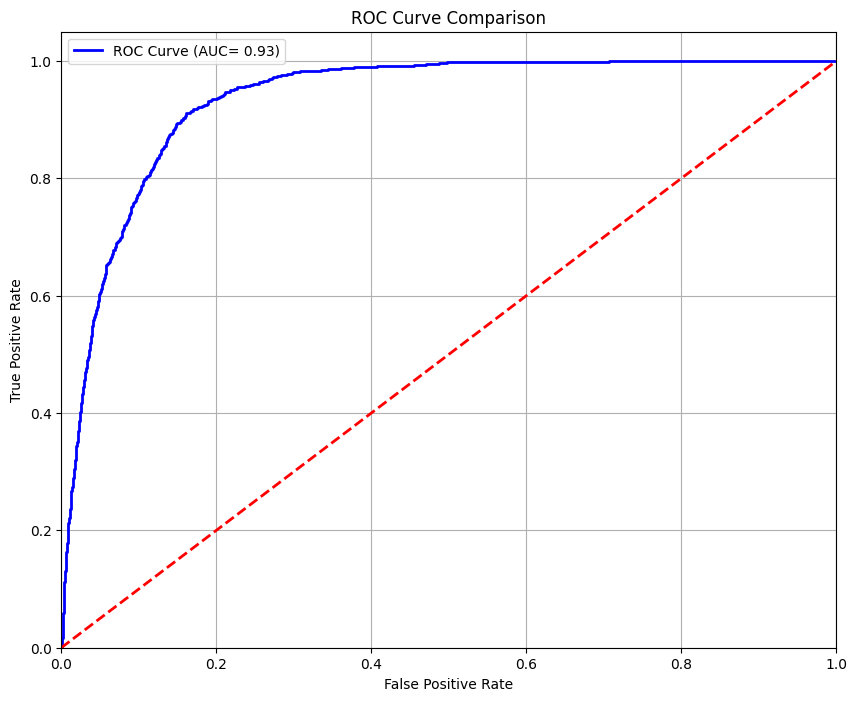

In [14]:
#simple_pipe
# Predict probabilities on the testing data
probas = simple_pipe.predict_proba(X_test)[:,1]
#probas
#y_test
#Compute ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, probas, pos_label='yes')
roc_auc = auc(fpr, tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC= %0.2f)' % roc_auc)
#plt.plot(fpr, tpr, label='Logistc' (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', lw= '2' )
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [12]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)
}

Model Name: Logistic Regression
Logistic Regression: Training time: 3.7317s, Training accuracy: 0.9118
Model Name: KNN
KNN: Training time: 0.1948s, Training accuracy: 0.9277
Model Name: Decision Tree
Decision Tree: Training time: 0.4642s, Training accuracy: 1.0000
Model Name: SVM
SVM: Training time: 238.5371s, Training accuracy: 0.9227


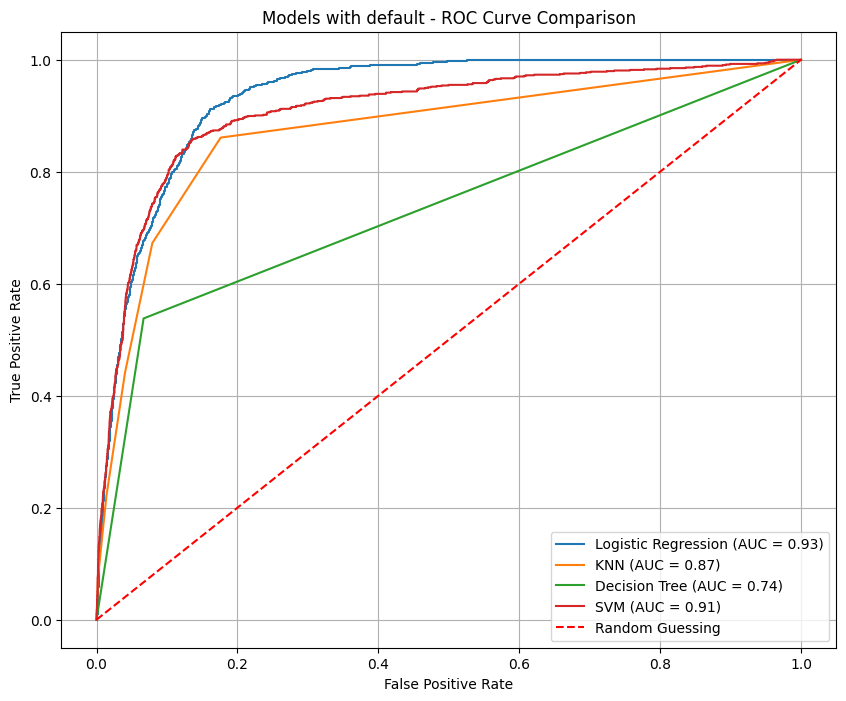

In [15]:
# Create an empty list to store individual DataFrames
dfs = []

# Train classifiers and plot ROC curves
plt.figure(figsize=(10, 8))
# Measure training time and evaluate training accuracy
for name, clf in classifiers.items():
    start_time = time.time()
    # Create pipeline with preprocessor and classifier
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('classifier', clf)])
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time
    print("Model Name:",name)
    train_accuracy = pipe.score(X_train, y_train)
    # Evaluate test accuracy
    test_accuracy = pipe.score(X_test, y_test)
    model_df = pd.DataFrame({'Model': name, 'Train Time': train_time,'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}, index=[0])
    dfs.append(model_df)
    print(f"{name}: Training time: {train_time:.4f}s, Training accuracy: {train_accuracy:.4f}")
    probas = pipe.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1],pos_label='yes')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models with default - ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()



In [16]:
default_result_df = pd.concat(dfs, ignore_index=True)
default_result_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,3.731744,0.911806,0.911386
1,KNN,0.194780,0.927709,0.900704
2,Decision Tree,0.464192,1.000000,0.888322
3,SVM,238.537104,0.922671,0.911750


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Best parameters for Logistic Regression: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Test accuracy of best model: 0.9114, Training time: 66.2672s
Best parameters for KNN: {'clf__n_neighbors': 7}
Test accuracy of best model: 0.9042, Training time: 27.1098s
Best parameters for Decision Tree: {'clf__max_depth': 5}
Test accuracy of best model: 0.9150, Training time: 9.1622s
Best parameters for SVM: {'clf__C': 1, 'clf__kernel': 'rbf'}
Test accuracy of best model: 0.9118, Training time: 4866.1287s


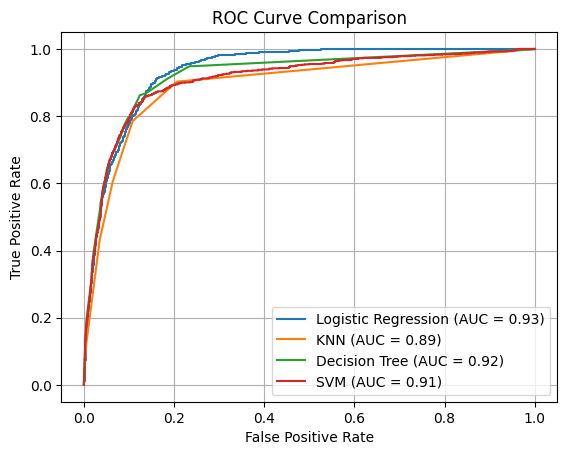

In [13]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'clf__C': [0.1, 1, 10], 'clf__penalty': ['l1', 'l2'],'clf__solver':['liblinear']},
    'KNN': {'clf__n_neighbors': [3, 5, 7]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10, 20]},
    'SVM': {'clf__C': [ 1, 10], 'clf__kernel': ['linear', 'rbf']}
}

# Create an empty list to store individual DataFrames
tuned_dfs = []

# Perform hyperparameter tuning with GridSearchCV
for name, clf in classifiers.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('clf', clf)])
    grid_param = param_grids[name]
    start_time = time.time()
    grid_search = GridSearchCV(pipe, param_grid=grid_param, cv=5,scoring='accuracy')
    grid_search.fit(X_train, y_train)
    fit_time = time.time() - start_time
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate best model on test set
    best_model = grid_search.best_estimator_
    tuned_train_score = grid_search.best_score_
    # Evaluate best model on test set
    tuned_test_accuracy_best = best_model.score(X_test, y_test)
    print(f"Test accuracy of best model: {tuned_test_accuracy_best:.4f}, Training time: {fit_time:.4f}s")
    # Evaluate test accuracy
    #test_accuracy_best = best_model.score(X_test, y_test)
    tuned_model_df = pd.DataFrame({'Tuned Model': name, 'Train Time': fit_time,
                                   'Train Accuracy': tuned_train_score,
                                   'Test Accuracy': tuned_test_accuracy_best}, index=[0])
    tuned_dfs.append(tuned_model_df)

    #Predict probabilities on test set
    probas = grid_search.predict_proba(X_test)

    #Calculate ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test,probas[:,1],pos_label='yes')
    roc_auc = auc(fpr,tpr)

    #Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
tuned_results_df = pd.concat(tuned_dfs, ignore_index=True)

tuned_results_df

,Tuned Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,66.267163,0.911017,0.911386
1,KNN,27.109801,0.901396,0.904224
2,Decision Tree,9.162165,0.913475,0.915028
3,SVM,4866.128677,0.911533,0.911750


In [15]:
tuned_results_df

,Tuned Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,66.267163,0.911017,0.911386
1,KNN,27.109801,0.901396,0.904224
2,Decision Tree,9.162165,0.913475,0.915028
3,SVM,4866.128677,0.911533,0.911750


<function matplotlib.pyplot.show(close=None, block=None)>

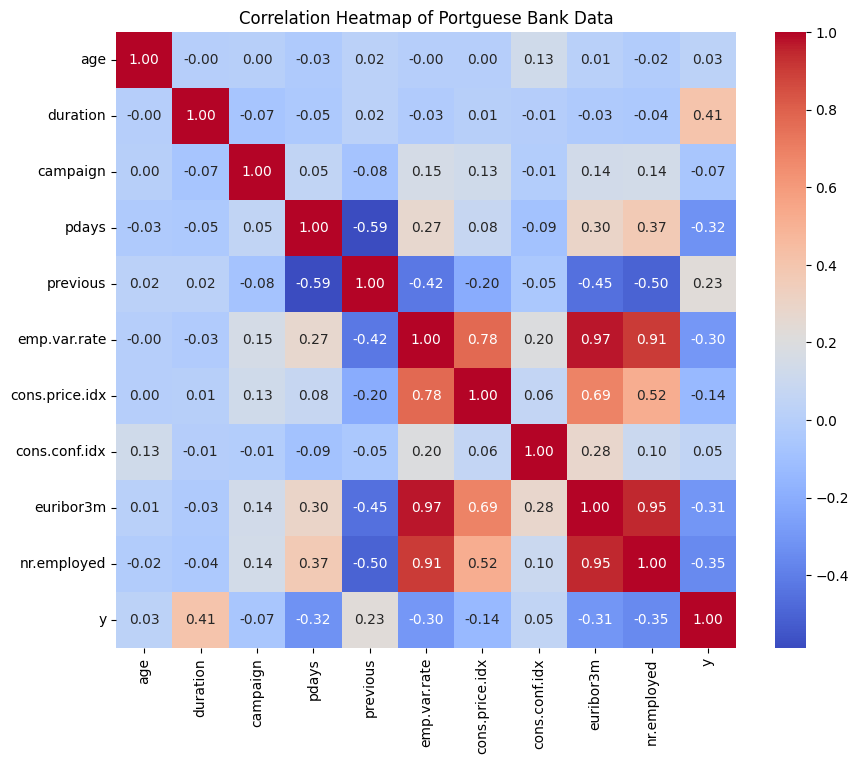

In [66]:
import seaborn as sns

numeric_data = df.select_dtypes(include=['int64','float64'])
numeric_data['y'] = df['y'].map({'yes':1,'no':0})
correlation_matrix =numeric_data.corr()
#create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Portguese Bank Data')
plt.show

##### Questions